In [1]:
import dmdd
import numpy as np
%matplotlib inline


# 
This cell demonstrates that dRdQ_AM has the same value as dRdQ at day 0 and day 365, when the v_lag is = 220.

In [9]:
print dmdd.dRdQ_AM(sigma_si = 75.5)
print dmdd.rate_UV.dRdQ(Q = np.asarray([100.]), sigma_si = 75.5)
print dmdd.dRdQ_AM(sigma_si = 75.5, time = 365)



[  2.80527965e-17]
[  2.80527965e-17]
[  2.80527965e-17]


# 
This cell demonstates the rate_UV.dRdQ can recieve multiple Qs and return them as an array.
The following cell shows the same thing, but for dRdQ_AM. 

In [9]:
dmdd.rate_UV.dRdQ(Q = np.array([50., 60., 70., 80., 90., 100.]), sigma_si = 75.5)

# demonstrats that rate_UV.dRdQ can take multiple Q's

array([  3.41365358e-12,   8.46638177e-13,   1.77757110e-13,
         2.84875973e-14,   2.61626746e-15,   2.80527965e-17])

In [14]:
dmdd.dRdQ_AM(Q = [10., 30., 50., 100.], sigma_si = 75.5, time = 0)
# demonstrates that dRdQ_AM can take multiple Q's as a list

array([  3.36242431e-10,   3.99546567e-11,   3.41365358e-12,
         2.80527965e-17])

# 
This cell is showing the relative progression of rate over various times for fixed parameters.

In [5]:
print dmdd.dRdQ_AM(sigma_si = 75.5, time = 50)
print dmdd.dRdQ_AM(sigma_si = 75.5, time = 100)
print dmdd.dRdQ_AM(sigma_si = 75.5, time = 150)
print dmdd.dRdQ_AM(sigma_si = 75.5, time = 200)
print dmdd.dRdQ_AM(sigma_si = 75.5, time = 250)
print dmdd.dRdQ_AM(sigma_si = 75.5, time = 300)
print dmdd.dRdQ_AM(sigma_si = 75.5, time = 350)

4.82670411027e-17
5.60804696581e-17
4.13587573918e-17
2.21276374859e-17
1.26696223086e-17
1.28934420233e-17
2.28944209347e-17


# 
Demonstration of integral function

In [6]:
dmdd.integral(1., 100., 0., 365., sigma_si = 75.5)

2.9231845333250124e-06

# 
Testing integral function for a known integral with an exact value of 1/6 .

In [7]:
def funct1(Q,time, sigma_si, sigma_anapole, mass, element, v_amplitude):
    return (Q**2)*(time)
#have to define like this due to the way integral is defined, but still returns correct answer

In [8]:
dmdd.integral(0, 1, 0, 1, function = funct1)

0.16675008341675007

# 
Model and experiment to be used in simulations

In [10]:
# shortcut for scattering models corresponding to rates coded in rate_UV:
anapole_model = dmdd.UV_Model('Anapole', ['mass','sigma_anapole'])
SI_model = dmdd.UV_Model('SI', ['mass','sigma_si'])

print 'model: {}, parameters: {}.'.format(anapole_model.name, anapole_model.param_names)
print 'model: {}, parameters: {}.'.format(SI_model.name, SI_model.param_names)

model: Anapole, parameters: ['mass', 'sigma_anapole'].
model: SI, parameters: ['mass', 'sigma_si'].


In [11]:
# intialize an Experiment with XENON target, to be passed to Simulation_AM:
xe = dmdd.Experiment('1xe', 'xenon', 15, 20, 1000, dmdd.eff.efficiency_unit, energy_resolution=True)





# 
Attempting to run Simulation_AM

TypeError: only length-1 arrays can be converted to Python scalars

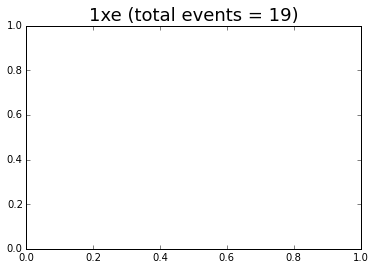

In [12]:
xe = dmdd.Simulation_AM('AM_xenon', xe, SI_model, {'mass':50.,'sigma_si':75.5}, Qmin = 15, Qmax = 20,
                       Tmin = 0, Tmax = 50, sigma_si = 75.5, element = 'xenon')



# works but takes ~30 seconds to find each particle


#getting an error called  "TypeError: only length-1 arrays can be converted to Python scalars" when graphing